# Sales Data Analysis
### Regression and Correlation analysis - October 2023

This project is a quick look into some sales data with a focus on regression and correlation.

For a bit of context, this dataset was taken from kaggle (https://www.kaggle.com/datasets/ai0909/sales-data-for-company-product/), and is otherwise flawless. So while I will outline some EDA, there wasn't much to do in terms of normalizing or tidying up before the analysis started.



In [38]:
# Prepping the data
import pandas as pd
sales_data = pd.read_csv('/Users/camerongomez/Desktop/market_data.csv')

sales_data.head(5)

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
0,240368,59.90,0.46,46.30,0.45,12.56,1065,1081.60
1,207276,7.28,0.39,166.91,0.05,5.44,1832,651.24
2,172572,9.81,0.41,73.67,0.06,3.54,587,1066.56
3,82697,46.94,0.27,33.95,0.88,28.90,1407,1855.27
4,141762,2.59,0.26,82.63,0.36,4.66,2057,1608.91


In [39]:
# Starting with some overall information and a general breakdown before correlation

# Calculating Descriptive Statistics for the Sales Data
desc_stats = sales_data.describe()

# Calculating correlation between the variables
correlation_matrix = sales_data.corr()

desc_stats, correlation_matrix


(                Sale  InStrSpending    Discount  TVSpending   StockRate  \
 count     992.000000     992.000000  992.000000  992.000000  992.000000   
 mean   171327.118952      30.593034    0.251139   98.678740    0.494526   
 std     81397.843301      17.493103    0.145348   57.117347    0.286810   
 min      1992.000000       0.190000    0.000000    0.130000    0.000000   
 25%    112479.250000      14.830000    0.130000   49.637500    0.250000   
 50%    170390.500000      31.385000    0.250000   97.510000    0.490000   
 75%    226027.250000      45.660000    0.380000  147.620000    0.740000   
 max    393914.000000      59.960000    0.500000  199.910000    1.000000   
 
             Price        Radio  OnlineAdsSpending  
 count  992.000000   992.000000         992.000000  
 mean    14.599829  1479.569556        1596.504284  
 std      8.715533   885.419636         927.474787  
 min      0.140000     4.000000          12.540000  
 25%      6.917500   708.250000         786.32750

Based on the above description of the data, we can see that everything is in order and our correlation matrix is on track. Although we can also make it look a bit cleaner and easier to comprehend.

In [40]:
# After converting the sales_data to a dataframe, we can see the correlation matrix as a table.
df = pd.DataFrame(sales_data)
df.corr()

,Sale,InStrSpending,Discount,TVSpending,StockRate,Price,Radio,OnlineAdsSpending
Sale,1.000000,0.577708,0.010998,0.413330,-0.072435,-0.673372,-0.015362,0.042385
InStrSpending,0.577708,1.000000,0.028830,-0.018534,0.031747,0.044907,-0.087285,0.033268
Discount,0.010998,0.028830,1.000000,-0.013651,-0.012617,0.012604,-0.004328,-0.034600
TVSpending,0.413330,-0.018534,-0.013651,1.000000,-0.045078,-0.013569,-0.000920,0.012382
StockRate,-0.072435,0.031747,-0.012617,-0.045078,1.000000,0.036756,-0.001413,-0.004633
Price,-0.673372,0.044907,0.012604,-0.013569,0.036756,1.000000,-0.055059,-0.022972
Radio,-0.015362,-0.087285,-0.004328,-0.000920,-0.001413,-0.055059,1.000000,0.045425
OnlineAdsSpending,0.042385,0.033268,-0.034600,0.012382,-0.004633,-0.022972,0.045425,1.000000


What did we find out from the correlation matrix?

1) Sale has a significant negative correlation with Price (−0.67) indicating that as prices increase, sales might decrease (and vice versa).
2) Sale shows a notable positive correlation with InStrSpending (0.58) and TVSpending (0.41), suggesting that these marketing channels might positively impact sales.
3) Discount does not show a strong correlation with Sale, which could mean that the discounting strategy might not be significantly impacting the sales volume.
4) StockRate and Sale have a slight negative correlation (−0.07), which might indicate that stock-outs could negatively impact sales, but the relationship is not very strong.
5) Other variables also exhibit various degrees of correlation, providing multiple avenues to explore during in-depth analysis.

In [41]:
# Renaming the correlation matrix so it shows up properly in my plots below.
matrix = df.corr()

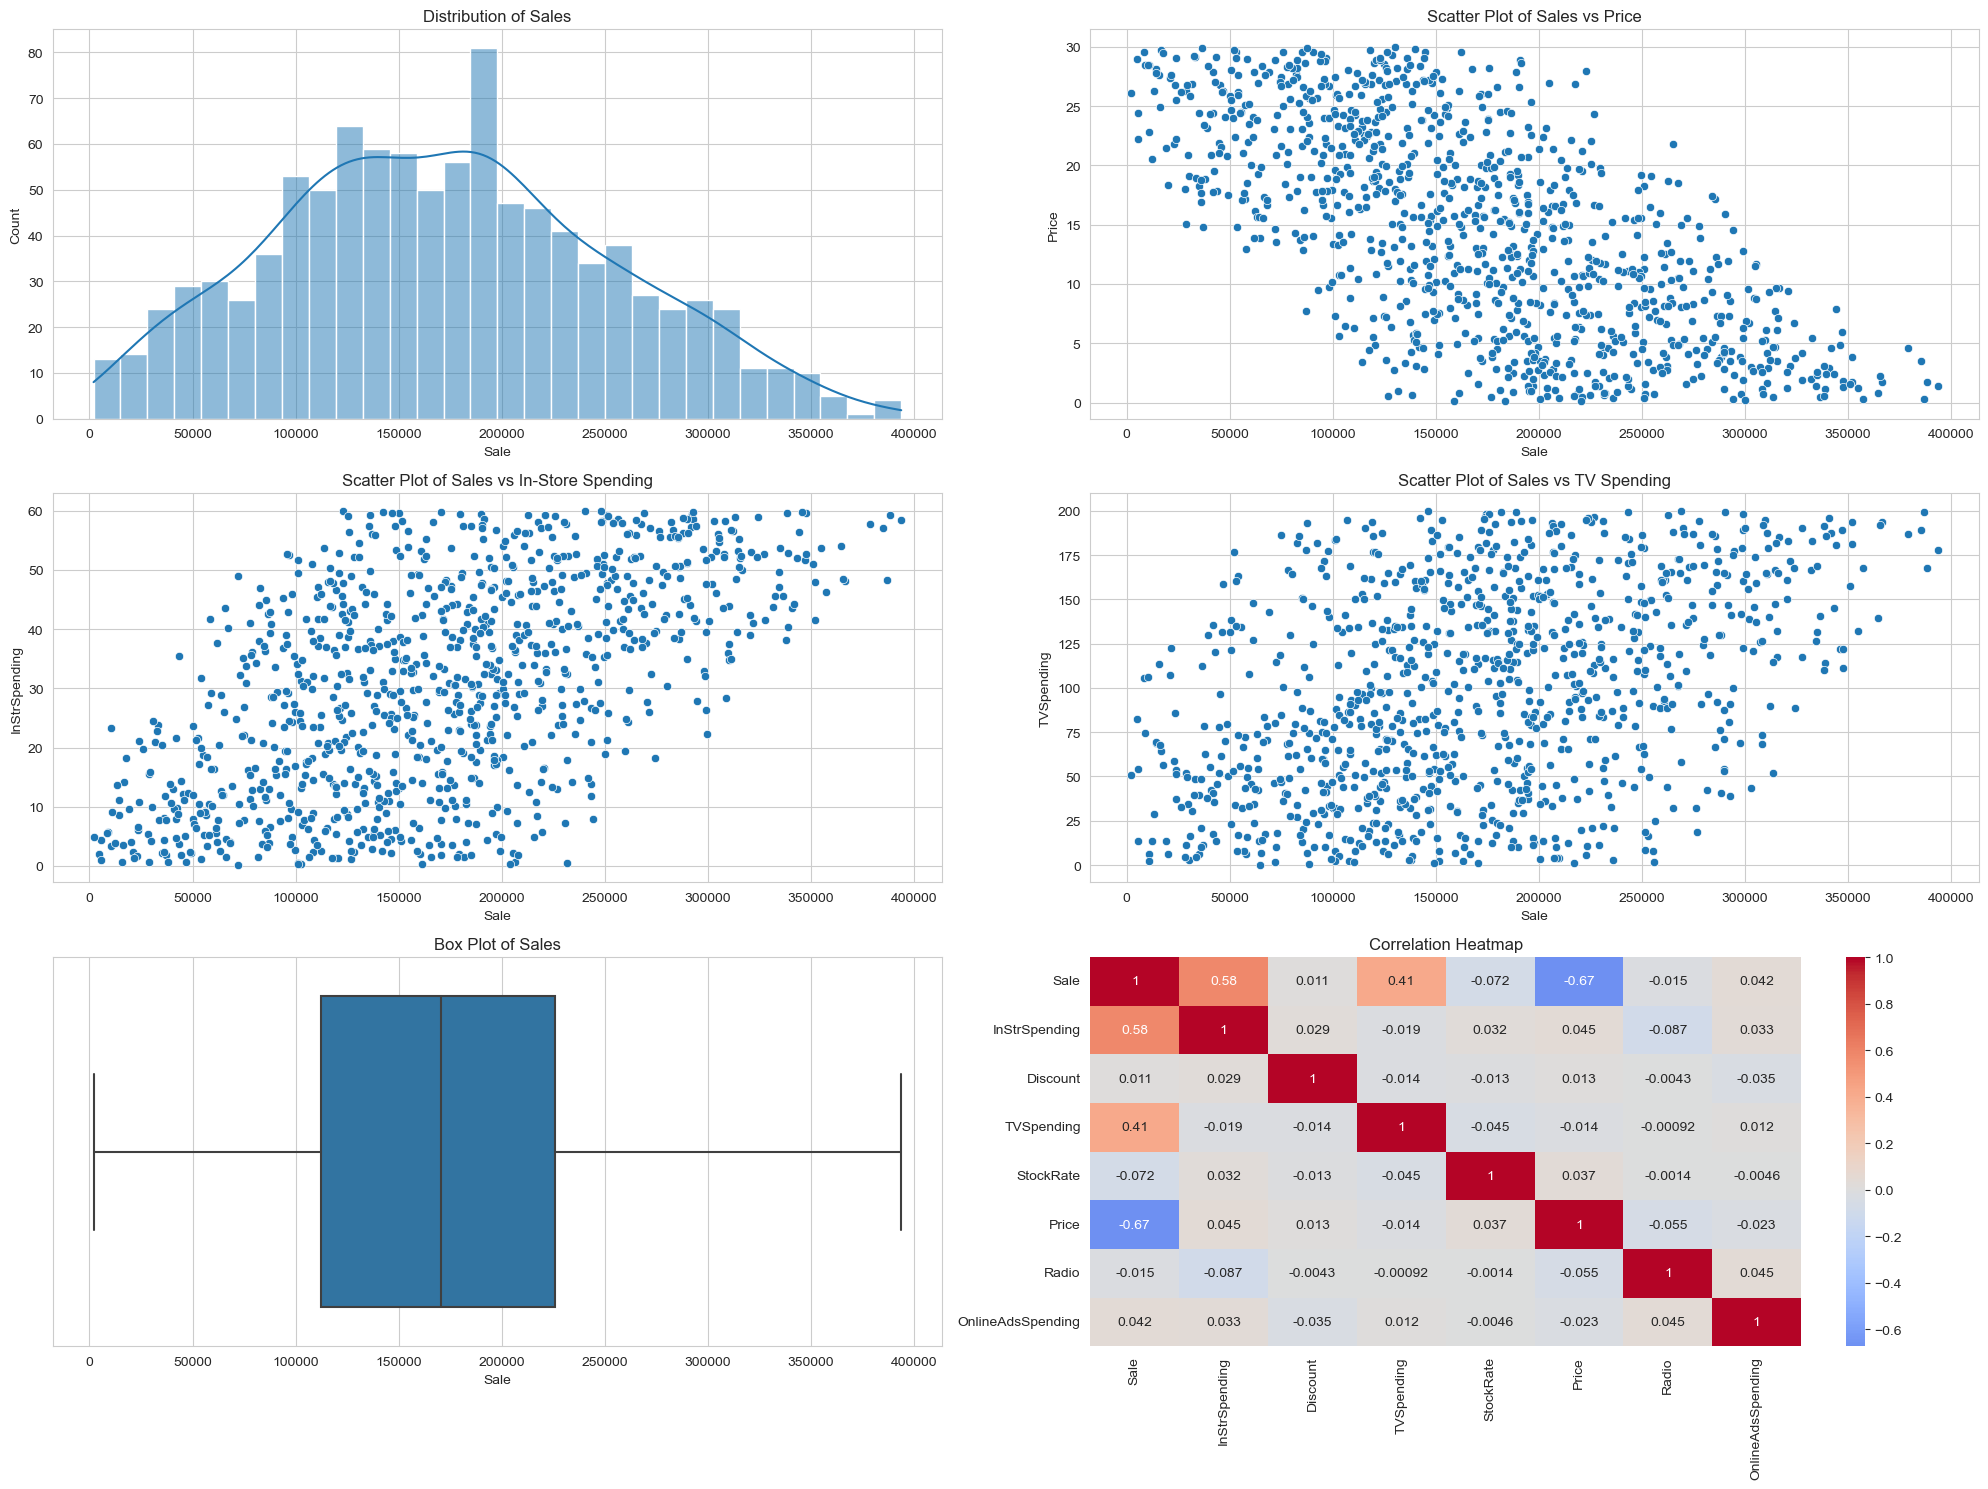

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the vizzes
sns.set_style("whitegrid")

# Set up the figure
plt.figure(figsize=(20,15))

# Create subplots: 3 rows and 2 columns
plt.subplot(3, 2, 1)
sns.histplot(sales_data['Sale'], bins = 30, kde = True)
plt.title("Distribution of Sales")

plt.subplot(3, 2, 2)
sns.scatterplot(x = 'Sale', y = 'Price', data = sales_data)
plt.title("Scatter Plot of Sales vs Price")

plt.subplot(3, 2, 3)
sns.scatterplot(x = 'Sale', y = 'InStrSpending', data = sales_data)
plt.title('Scatter Plot of Sales vs In-Store Spending')

plt.subplot(3, 2, 4)
sns.scatterplot(x = 'Sale', y = 'TVSpending', data = sales_data)
plt.title('Scatter Plot of Sales vs TV Spending')

plt.subplot(3, 2, 5)
sns.boxplot(x = sales_data['Sale'])
plt.title('Box Plot of Sales')

plt.subplot(3, 2, 6)
sns.heatmap(matrix, annot = True, cmap = 'coolwarm', center = 0)
plt.title('Correlation Heatmap')

# Layout
plt.tight_layout()

# Display plots
plt.show()

### Insights
1) Distribution of Sales: The sales data seems to be somewhat normally distributed with a slight skew to the right, indicating some periods of higher sales.
2) Scatter Plot of Sales vs. Price: There appears to be a negative correlation between price and sales, which is consistent with the correlation matrix. Lower prices might be driving higher sales.
3) Scatter Plot of Sales vs. In-Store Spending: A general positive trend is visible here, where higher in-store spending seems to correspond with increased sales.
4) Scatter Plot of Sales vs. TV Spending: TV spending also seems to have a positive relationship with sales, though it might be worthwhile to explore if there are diminishing returns at higher spending levels.
5) Box Plot of Sales: The box plot helps visualize the spread and central tendency of sales. There don't appear to be significant outliers.
6) Correlation Heatmap: The heatmap provides a visual guide to our correlation matrix, making it easy to identify noteworthy correlations at a glance.

In [43]:
# Next, we'll move on to some simple linear regression - first we will explore one relationship, then move on to multiple.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = sales_data[['Price']]
Y = sales_data[['Sale']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = LinearRegression()

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

coefficients = model.coef_
intercept = model.intercept_

rmse = np.sqrt(mean_squared_error(Y_test, predictions))
r2 = r2_score(Y_test, predictions)

(coefficients, intercept, rmse, r2)

(array([[-6095.69261208]]),
 array([259898.83907943]),
 63163.5874523222,
 0.4768194046786155)

### Simple Regression Insights
Based on our model equation, Sale = 259898.84 − 6095.69 * Price, we have a few main takeaways.

1) Coefficient for Price: -6095.69. This coefficient shows that, generally, a unit increase in Price results in a decrease of 6095.69 in Sales.

2) Intercept is 259898.84. Overall, this means that if our Price is set to zero, Sales would be 259898.84. Worth noting despite the unrealistic premise.

3) Model Performance and RMSE: 63163.59. In this case, RMSE is a general measure of how well the model worked - and a lower value would indicate a better fit. Taking things a step further, our R-Squared comes out at 0.48, or 48%, which is a reasonable fit for describing the relationship between Price and Sales, but not especially strong.

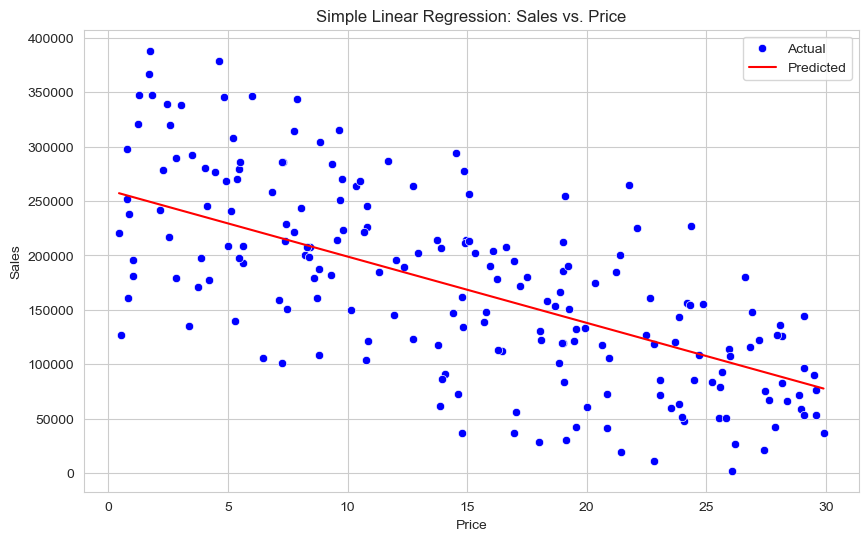

In [46]:
# Visualizing the simple linear regression
plt.figure(figsize=(10, 6))

# Scatter plot of the actual test data
sns.scatterplot(x=X_test['Price'], y=Y_test['Sale'], color='blue', label='Actual')

# Plotting the predicted sales values
sns.lineplot(x=X_test['Price'], y=predictions.ravel(), color='red', label='Predicted')

# Title and labels
plt.title('Simple Linear Regression: Sales vs. Price')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.legend()

plt.show()



### Simple Linear Regression Visualization
The red line (predicted values) captures the general downward trend in sales as price increases, consistent with the negative coefficient we observed.
There’s variability in sales that isn’t explained by price, as indicated by the spread of actual values (blue crosses) around the predicted line. This is expected, considering the R-Squared value of 0.48, meaning that while Price explains some variability in Sales, a significant portion is still unexplained.

Our next steps will involve finding out what accounts for this variablity. 

### Multiple Regression Analysis

In [49]:
# Defining multiple predictor variables and target variable
X_multi = sales_data[['Price', 'InStrSpending', 'TVSpending', 'Radio', 'OnlineAdsSpending']]
y_multi = sales_data['Sale']

# Splitting data into training and testing sets (80-20 split)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model_multi = LinearRegression()

# Fitting the model on the training data
model_multi.fit(X_train_multi, y_train_multi)

# Predicting the Sale values for the test set
predictions_multi = model_multi.predict(X_test_multi)

# Calculating and printing the model coefficients and intercept
coefficients_multi = model_multi.coef_
intercept_multi = model_multi.intercept_

# Calculating and printing model performance metrics
rmse_multi = np.sqrt(mean_squared_error(y_test_multi, predictions_multi))
r2_multi = r2_score(y_test_multi, predictions_multi)

(coefficients_multi, intercept_multi, rmse_multi, r2_multi)


(array([-6.47604532e+03,  2.86875436e+03,  5.91064263e+02,  4.01088161e-02,
         1.66542763e-01]),
 119461.3768234537,
 5035.558787162138,
 0.9966748335342385)

### Insights
The main takeaway here is that our model performed significantly better. We have a much lower RMSE of 5053.56 which is a much better fit. Additionally, our R-Squared value is very high at 99.67%, indicating a very strong fit (which is possibly a concern, more on that below).

Price has a significant negative coefficient, confirming the inverse relationship we observed earlier.
InStrSpending and TVSpending have positive coefficients, indicating that increases in these spending types are associated with increases in Sales.
Radio and OnlineAdsSpending also have positive coefficients but are much smaller, suggesting a weaker association with Sales.
The model performance metrics indicate a very good fit, although a R-Squared value this high might warrant a closer look to ensure we’re not overfitting.

## Residuals

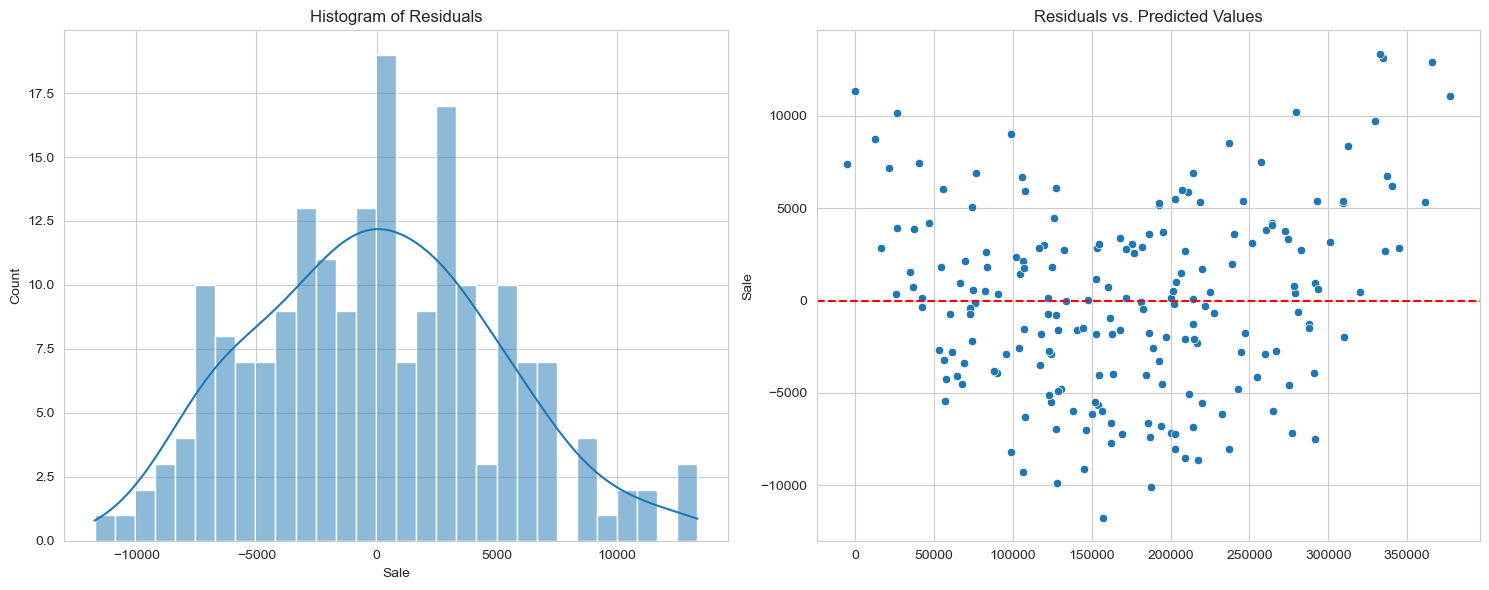

In [50]:
# Calculating residuals
residuals_multi = y_test_multi - predictions_multi

# Initialize the figure
plt.figure(figsize=(15, 6))

# Create subplots: 1 row and 2 columns
plt.subplot(1, 2, 1)
sns.histplot(residuals_multi, bins=30, kde=True)
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
sns.scatterplot(x=predictions_multi, y=residuals_multi)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


### Histogram of Residuals:
The residuals seem to be somewhat normally distributed, although there might be a slight skew. This is generally a good sign and indicates that the model’s predictions are unbiased.
Residuals vs. Predicted Values:
The scatter plot doesn’t show any clear pattern or funnel shape, which is a positive indication of homoscedasticity. The red dashed line represents a residual value of zero and helps visualize any patterns or biases in the residuals.
There do seem to be a few residuals that are larger in magnitude compared to the rest, which could potentially be outliers or instances where the model’s predictions were notably off.

### Takeaways:
The approximate normal distribution of residuals and the lack of clear patterns in the scatter plot suggest that our model is well-specified in terms of linearity and homoscedasticity.
However, always good to remember that visualization is one diagnostic tool among others, and deeper statistical tests might be utilized for a comprehensive diagnostic check of regression assumptions.


# Price Elasticity

In [52]:
# Coefficient for Price from the multiple regression model
beta_price = coefficients_multi[0]

# Average Price and Average Sales (Quantity) from the data
avg_price = sales_data['Price'].mean()
avg_sale = sales_data['Sale'].mean()

# Calculating Price Elasticity
price_elasticity = beta_price * (avg_price / avg_sale)

(price_elasticity, abs(price_elasticity) > 1)


(-0.5518633151224146, False)

The main takeaway is that demand for this product is inelastic, as it is <1.

Since the demand is inelastic, changes in price might not significantly impact the total revenue. Raising prices could increase revenue without causing a proportionally larger decrease in quantity sold.

# Advertising Elasticity

In [53]:
# Coefficients for advertising variables from the multiple regression model
beta_InStrSpending = coefficients_multi[1]
beta_TVSpending = coefficients_multi[2]
beta_Radio = coefficients_multi[3]
beta_OnlineAdsSpending = coefficients_multi[4]

# Average advertising spending from the data
avg_InStrSpending = sales_data['InStrSpending'].mean()
avg_TVSpending = sales_data['TVSpending'].mean()
avg_Radio = sales_data['Radio'].mean()
avg_OnlineAdsSpending = sales_data['OnlineAdsSpending'].mean()

# Calculating Advertising Elasticities
elasticity_InStrSpending = beta_InStrSpending * (avg_InStrSpending / avg_sale)
elasticity_TVSpending = beta_TVSpending * (avg_TVSpending / avg_sale)
elasticity_Radio = beta_Radio * (avg_Radio / avg_sale)
elasticity_OnlineAdsSpending = beta_OnlineAdsSpending * (avg_OnlineAdsSpending / avg_sale)

(elasticity_InStrSpending, elasticity_TVSpending, elasticity_Radio, elasticity_OnlineAdsSpending)


(0.5122592438290577,
 0.34043341785505976,
 0.0003463770566254713,
 0.0015519214751924973)

### Interpretting Advertising Elasticity
1) In-Store Spending: A 1% increase in in-store spending is associated with a 0.51% increase in sales, holding other factors constant. Elasticity is less than 1, indicating inelastic demand with respect to in-store spending.

2) TV Spending: A 1% increase in TV spending is associated with a 0.34% increase in sales, holding other factors constant. Similarly, elasticity is less than 1, indicating inelastic demand with respect to TV spending.

3) Radio Advertising: The elasticity is extremely low, suggesting that radio advertising has a minimal impact on sales in terms of percentage changes.

4) Online Ads Spending: Online ads spending also has a very low elasticity, indicating a limited impact on sales.

### Conclusions and Next Steps

At this point, the next step would be working on predictive modeling for forecasting sales. The main thing missing right now is timeseries data, which leaves us at an impasse since this dataset does not include any time related columns. 

Overall, this workbook shows the relationship between different variables and the elasticity between Price, Sales, and Advertising types. 